In [2]:
%timeit

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mth
from matplotlib import pyplot as plt

In [3]:
dollar=pd.read_excel("./datas/dolarBRL2011.2021.xlsx")
barril=pd.read_excel("./datas/petroleo.2011.2021.xlsx")

dollar['V.Médio']=(dollar['Máxima']+dollar['Mínima'])/2
dollar['Data']=pd.to_datetime(dollar['Data'],format='%m/%y')
dollar.sort_values('Data',inplace=True)
dollar.set_index('Data',inplace=True)
dollar.rename_axis('Período',inplace=True)

barril['V.Médio']=(barril['Máxima']+barril['Mínima'])/2
barril['Data']=pd.to_datetime(barril['Data'],format='%m/%y')
barril.sort_values('Data',inplace=True)
barril.set_index('Data',inplace=True)
barril.rename_axis('Período',inplace=True)

dollar['VUS.Norm']=dollar['V.Médio']/dollar['V.Médio'].max()
barril['VBar.Norm']=barril['V.Médio']/barril['V.Médio'].max()

In [4]:
dollar.head()

,Último,Abertura,Máxima,Mínima,Var%,V.Médio,VUS.Norm
Período,,,,,,,
2011-01-01,1.6670,1.6593,1.6965,1.6432,0.0046,1.66985,0.294847
2011-02-01,1.6635,1.6669,1.6862,1.6554,-0.0021,1.67080,0.295015
2011-03-01,1.6315,1.6635,1.6931,1.6207,-0.0192,1.65690,0.292560
2011-04-01,1.5765,1.6308,1.6308,1.5562,-0.0337,1.59350,0.281366
2011-05-01,1.5795,1.5765,1.6458,1.5688,0.0019,1.60730,0.283802


In [5]:
df_gas = pd.read_csv('C:/Users/ednae/Documents/Linguagens/data2/df_gas.csv')

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,3,7,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df_gas['Data da Coleta']=pd.to_datetime(df_gas['Data da Coleta'],format="%d/%m/%Y")
df_gas.sort_values('Data da Coleta',inplace=True)
df_gas.set_index('Data da Coleta',drop=False,inplace=True)
df_gas.rename_axis('Período',inplace=True)

In [7]:
df_gas.drop(['Municipio','Complemento'],axis=1,inplace=True)
df_gas.drop(['Bandeira'],axis=1,inplace=True)
df_gas.drop(['Município','Cep','Número Rua','Numero Rua','Regiao - Sigla','Região - Sigla'],axis=1,inplace=True)

df_gas['ano']=df_gas['Data da Coleta'].dt.year
df_gas['mes']=df_gas['Data da Coleta'].dt.month
df_gas['dia']=df_gas['Data da Coleta'].dt.day

## <b><i> Justificando uso da média, mostrando que o desvio padrão é baixo

In [8]:
mix_resumo=df_gas.groupby(['ano','mes','dia']).agg({'Valor de Venda':['mean','std','max','min']})
print(mix_resumo['Valor de Venda']['std'].max(),'desvio padrão máximo em todas as médias diárias calculadas')

0.4396596627479246 desvio padrão máximo em todas as médias diárias calculadas


In [9]:
df_gas2 = pd.DataFrame(df_gas['Valor de Venda'].resample('D').mean())
df_gas2['pct_change']=df_gas2.pct_change()*100
dif_med_mensal = df_gas2['pct_change'].resample('M').mean()

In [10]:
df_gas['VVNorm']=df_gas['Valor de Venda']/df_gas['Valor de Venda'].max()

In [11]:
gas_med_mensal = df_gas['Valor de Venda'].resample('M').mean()

In [12]:
gas_med_norm=df_gas['VVNorm'].resample('M').mean()

In [13]:
barril['pct_change']=barril['V.Médio'].pct_change()*100
dollar['pct_change']=dollar['V.Médio'].pct_change()*100

In [14]:
barril.loc['2016':,'pct_change'].describe()

count    69.000000
mean      1.430261
std      10.088836
min     -31.349387
25%      -3.778461
50%       2.695999
75%       7.244795
max      29.545455
Name: pct_change, dtype: float64

# <b> Correlações dos valores brutos

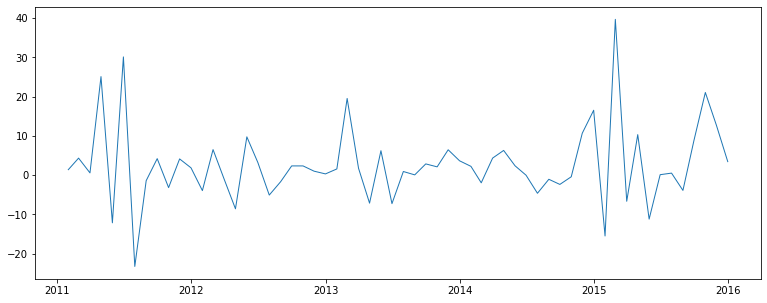

In [20]:
plt.figure(figsize=(13,5))
plt.plot(dif_med_mensal.loc['2011':'2015']*100,markersize=8,linestyle='-',linewidth=1,label='Variação mensal')

In [15]:
comp=pd.DataFrame({'bar':barril.loc[:'2015','V.Médio'],'dol':dollar.loc[:'2015','V.Médio'],'gas':gas_med_mensal[:'2015']})
comp.reset_index(inplace=True)
comp['mes']=comp['Período'].dt.month
comp['ano']=comp['Período'].dt.year
resum=pd.DataFrame(comp.groupby(['mes','ano']).agg(['mean']))
resum.corr()#controle de preço

,,bar,dol,gas
,,mean,mean,mean
bar,mean,1.000000,-0.898977,-0.879464
dol,mean,-0.898977,1.000000,0.938624
gas,mean,-0.879464,0.938624,1.000000


In [16]:
from matplotlib import pyplot as plt

In [17]:
gas_med_mensal.head()

Período
2011-01-31    2.645239
2011-02-28    2.651252
2011-03-31    2.692812
2011-04-30    2.842003
2011-05-31    2.866933
Freq: M, Name: Valor de Venda, dtype: float64

In [18]:
comp2=pd.DataFrame({'bar':barril.loc['2016':,'V.Médio'],'dol':dollar.loc['2016':,'V.Médio'],'gas':gas_med_mensal['2016':]})
comp2.reset_index(inplace=True)
comp2['mes']=comp['Período'].dt.month
comp2['ano']=comp['Período'].dt.year
resum2=pd.DataFrame(comp2.groupby(['mes','ano']).agg(['mean']))
resum2.corr()#PPI

,,bar,dol,gas
,,mean,mean,mean
bar,mean,1.00000,-0.396020,0.598330
dol,mean,-0.39602,1.000000,0.423181
gas,mean,0.59833,0.423181,1.000000


In [19]:
########NORMALIZADO
plt.figure(figsize=(13,5))
xx1=gas_med_norm
xx2=dollar.loc[:,'VUS.Norm']
xx3=barril.loc[:,'VBar.Norm']

xx1=xx1.reset_index()
xx2=xx2.reset_index()
xx3=xx3.reset_index()

xx1['dd']=xx1['Período'].dt.strftime('%Y-%m')
xx2['dd']=xx2['Período'].dt.strftime('%Y-%m')
xx3['dd']=xx3['Período'].dt.strftime('%Y-%m')

del(xx1['Período'])
del(xx2['Período'])
del(xx3['Período'])

xx1.set_index('dd',inplace=True)
xx2.set_index('dd',inplace=True)
xx3.set_index('dd',inplace=True)

print(len(xx1),len(xx2),len(xx3))

129 129 129


<Figure size 936x360 with 0 Axes>

In [26]:
'''#VNORMAL
plt.figure(figsize=(13,5))
xx1=gas_med_mensal
xx2=dollar.loc[:,'V.Médio']
xx3=barril.loc[:,'V.Médio']

xx1=xx1.reset_index()
xx2=xx2.reset_index()
xx3=xx3.reset_index()

xx1['dd']=xx1['Período'].dt.strftime('%Y-%m')
xx2['dd']=xx2['Período'].dt.strftime('%Y-%m')
xx3['dd']=xx3['Período'].dt.strftime('%Y-%m')

del(xx1['Período'])
del(xx2['Período'])
del(xx3['Período'])

xx1.set_index('dd',inplace=True)
xx2.set_index('dd',inplace=True)
xx3.set_index('dd',inplace=True)

print(len(xx1),len(xx2),len(xx3))'''

"#VNORMAL\nplt.figure(figsize=(13,5))\nxx1=gas_med_mensal\nxx2=dollar.loc[:,'V.Médio']\nxx3=barril.loc[:,'V.Médio']\n\nxx1=xx1.reset_index()\nxx2=xx2.reset_index()\nxx3=xx3.reset_index()\n\nxx1['dd']=xx1['Período'].dt.strftime('%Y-%m')\nxx2['dd']=xx2['Período'].dt.strftime('%Y-%m')\nxx3['dd']=xx3['Período'].dt.strftime('%Y-%m')\n\ndel(xx1['Período'])\ndel(xx2['Período'])\ndel(xx3['Período'])\n\nxx1.set_index('dd',inplace=True)\nxx2.set_index('dd',inplace=True)\nxx3.set_index('dd',inplace=True)\n\nprint(len(xx1),len(xx2),len(xx3))"

In [20]:
xx1.isna().sum()

VVNorm    2
dtype: int64

In [21]:
aa=xx1.isnull()

In [22]:
aa[aa['VVNorm']==True]

,VVNorm
dd,
2014-06,True
2020-09,True


In [23]:
xx1.loc['2014-06','Valor de Venda']=(xx1.loc['2014-05','Valor de Venda']+xx1.loc['2014-07','Valor de Venda'])/2
xx1.loc['2020-09','Valor de Venda']=(xx1.loc['2020-08','Valor de Venda']+xx1.loc['2020-10','Valor de Venda'])/2

KeyError: 'Valor de Venda'

In [24]:
xx1.loc['2014-06','VVNorm']=(xx1.loc['2014-05','VVNorm']+xx1.loc['2014-07','VVNorm'])/2
xx1.loc['2020-09','VVNorm']=(xx1.loc['2020-08','VVNorm']+xx1.loc['2020-10','VVNorm'])/2

In [25]:
import scipy.stats as sst

print("#########Controle de preço###########\n")
print(sst.pearsonr(xx1.loc['2011-02':'2015-12','VVNorm'],xx2.loc['2011-02':'2015-12','VUS.Norm']),'gas x dollar')
print(sst.pearsonr(xx1.loc['2011-02':'2015-12','VVNorm'],xx3.loc['2011-02':'2015-12','VBar.Norm']),'gas x barril')
print(sst.pearsonr(xx2.loc['2011-02':'2015-12','VUS.Norm'],xx3.loc['2011-02':'2015-12','VBar.Norm']),'barril x dollar')

print("\n#########PPI###########\n")
print(sst.pearsonr(xx1.loc['2016':,'VVNorm'],xx2.loc['2016':,'VUS.Norm']),'gas x dollar')
print(sst.pearsonr(xx1.loc['2016':,'VVNorm'],xx3.loc['2016':,'VBar.Norm']),'gas x barril')
print(sst.pearsonr(xx2.loc['2016':,'VUS.Norm'],xx3.loc['2016':,'VBar.Norm']),'barril x dollar')

#########Controle de preço###########

(0.9365475362109106, 1.2578454656642972e-27) gas x dollar
(-0.8855090118288554, 1.2519826146268473e-20) gas x barril
(-0.9070948292406824, 4.391580457983609e-23) barril x dollar

#########PPI###########

(0.6374293935432829, 3.874196387254758e-09) gas x dollar
(0.5887618239306045, 1.0322307674214195e-07) gas x barril
(-0.13150435947072037, 0.28144142580938486) barril x dollar


In [26]:
import scipy.stats as sst

print("#########Controle de preço###########\n")
print(sst.pearsonr(xx1.loc['2011-02':'2015-12','Valor de Venda'],xx2.loc['2011-02':'2015-12','V.Médio']),'gas x dollar')
print(sst.pearsonr(xx1.loc['2011-02':'2015-12','Valor de Venda'],xx3.loc['2011-02':'2015-12','V.Médio']),'gas x barril')
print(sst.pearsonr(xx2.loc['2011-02':'2015-12','V.Médio'],xx3.loc['2011-02':'2015-12','V.Médio']),'barril x dollar'

print("\n#########PPI###########\n")
print(sst.pearsonr(xx1.loc['2016':,'Valor de Venda'],xx2.loc['2016':,'V.Médio']),'gas x dollar')
print(sst.pearsonr(xx1.loc['2016':,'Valor de Venda'],xx3.loc['2016':,'V.Médio']),'gas x barril')
print(sst.pearsonr(xx2.loc['2016':,'V.Médio'],xx3.loc['2016':,'V.Médio']),'barril x dollar')

SyntaxError: invalid syntax (Temp/ipykernel_12880/1396482768.py, line 8)

# <b> Correlações das variações mensais

In [ ]:
comp=pd.DataFrame({'var_bar':barril.loc[:'2015','pct_change'],'var_dol':dollar.loc[:'2015','pct_change'],'var_gas':dif_med_mensal[:'2015']})
comp.reset_index(inplace=True)
comp['mes']=comp['Período'].dt.month
comp['ano']=comp['Período'].dt.year
resum3=pd.DataFrame(comp.groupby(['mes','ano']).agg(['mean']))
resum3.corr()#controle de preço

In [ ]:
comp=pd.DataFrame({'var_bar':barril.loc['2016':,'pct_change'],'var_dol':dollar.loc['2016':,'pct_change'],'var_gas':dif_med_mensal['2016':]})
comp.reset_index(inplace=True)
comp['mes']=comp['Período'].dt.month
comp['ano']=comp['Período'].dt.year
resum4=pd.DataFrame(comp.groupby(['mes','ano']).agg(['mean']))
resum4.corr()#PPI

In [ ]:
plt.figure(figsize=(13,5))
x1=dif_med_mensal
x2=dollar.loc[:,'pct_change']
x3=barril.loc[:,'pct_change']

x1=x1.reset_index()
x2=x2.reset_index()
x3=x3.reset_index()

x1['dd']=x1['Período'].dt.strftime('%Y-%m')
x2['dd']=x2['Período'].dt.strftime('%Y-%m')
x3['dd']=x3['Período'].dt.strftime('%Y-%m')

del(x1['Período'])
del(x2['Período'])
del(x3['Período'])

x1.set_index('dd',inplace=True)
x2.set_index('dd',inplace=True)
x3.set_index('dd',inplace=True)

print(len(x1),len(x2),len(x3))

In [ ]:
import scipy.stats as sst

print("#########Controle de preço###########\n")
print(sst.pearsonr(x1.loc['2011-02':'2015-12','pct_change'],x2.loc['2011-02':'2015-12','pct_change']),'gas x dollar')
print(sst.pearsonr(x1.loc['2011-02':'2015-12','pct_change'],x3.loc['2011-02':'2015-12','pct_change']),'gas x barril')
print(sst.pearsonr(x2.loc['2011-02':'2015-12','pct_change'],x3.loc['2011-02':'2015-12','pct_change']),'barril x dollar')

print("\n#########PPI###########\n")
print(sst.pearsonr(x1.loc['2016':,'pct_change'],x2.loc['2016':,'pct_change']),'gas x dollar')
print(sst.pearsonr(x1.loc['2016':,'pct_change'],x3.loc['2016':,'pct_change']),'gas x barril')
print(sst.pearsonr(x2.loc['2016':,'pct_change'],x3.loc['2016':,'pct_change']),'barril x dollar')

In [ ]:
x3.loc['2016':,'pct_change']

# GRÁFICOS DAS OBSERVAÇÕES COMBINADAS

In [28]:
combined_cp=pd.DataFrame()
combined_cp['gas']=xx1.loc['2011-01':'2015-12','VVNorm']
combined_cp['dol']=xx2.loc['2011-02':'2015-12','VUS.Norm']
combined_cp['bar']=xx3.loc['2011-02':'2015-12','VBar.Norm']

combined_ppi=pd.DataFrame()
combined_ppi['gas']=xx1.loc['2016-01':,'VVNorm']
combined_ppi['dol']=xx2.loc['2016-01':,'VUS.Norm']
combined_ppi['bar']=xx3.loc['2016-01':,'VBar.Norm']

In [29]:
 %timeit

<AxesSubplot:xlabel='Período do controle de preço', ylabel='Valores normalizados'>

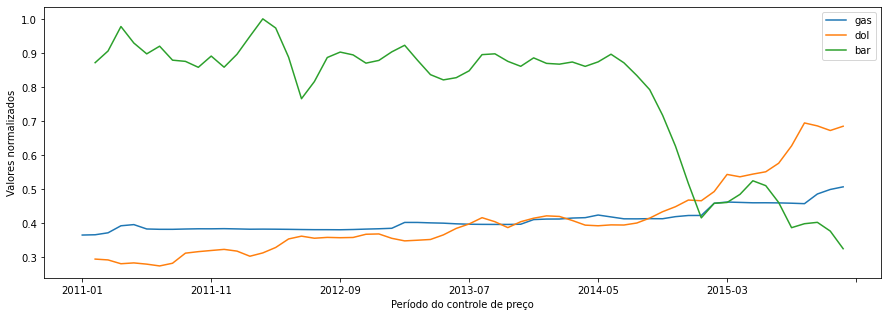

In [30]:
combined_cp.plot(subplots=False,figsize=(15,5),xlabel='Período do controle de preço',ylabel='Valores normalizados')

<AxesSubplot:xlabel='Período do PPI', ylabel='Valores normalizados'>

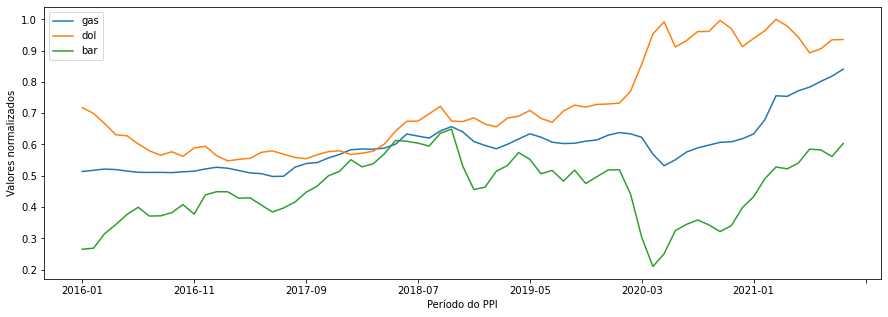

In [31]:
combined_ppi.plot(subplots=False,figsize=(15,5),xlabel='Período do PPI',ylabel='Valores normalizados')

# GRÁFICOS DAS VARIAÇÕES COMBINADAS

In [38]:
combined_vcp=pd.DataFrame()
combined_vcp['var_gas']=x1.loc['2011-01':'2015-12','pct_change']/x1.loc['2011-01':'2015-12','pct_change'].max()
combined_vcp['var_dol']=x2.loc['2011-02':'2015-12','pct_change']/x2.loc['2011-02':'2015-12','pct_change'].max()
combined_vcp['var_bar']=x3.loc['2011-02':'2015-12','pct_change']/x3.loc['2011-02':'2015-12','pct_change'].max()

combined_vppi=pd.DataFrame()
combined_vppi['var_gas']=x1.loc['2016-01':,'pct_change']/x1.loc['2016-01':,'pct_change'].max()
combined_vppi['var_dol']=x2.loc['2016-01':,'pct_change']/x2.loc['2016-01':,'pct_change'].max()
combined_vppi['var_bar']=x3.loc['2016-01':,'pct_change']/x3.loc['2016-01':,'pct_change'].max()


NameError: name 'x1' is not defined

In [32]:
combined_vcp.plot(subplots=False,figsize=(15,5),xlabel='Período do controle de preço',ylabel='Variação percentual normalizada')

NameError: name 'combined_vcp' is not defined

<AxesSubplot:xlabel='Período do PPI', ylabel='Variação percentual normalizada'>

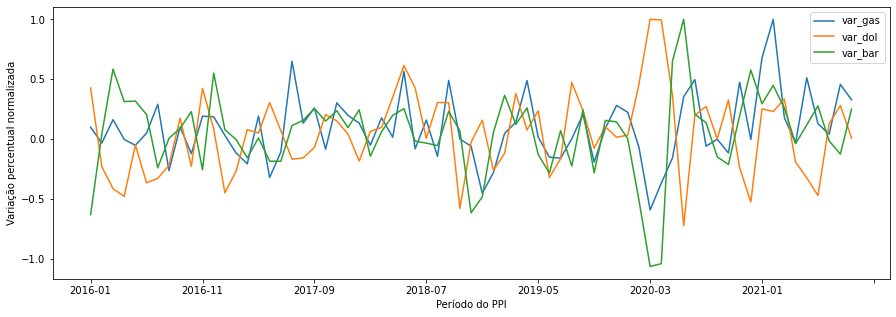

In [39]:
combined_vppi.plot(subplots=False,figsize=(15,5),xlabel='Período do PPI',ylabel='Variação percentual normalizada')

# PREVISOES

## Controle de preço

In [35]:
from fbprophet.diagnostics import performance_metrics

In [34]:
from sklearn import metrics
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation


In [36]:
df_gasolina = pd.DataFrame({"y":gas_med_mensal})

In [37]:
df_gasolina.reset_index(inplace=True)

In [38]:
df_gasolina.rename(columns={'Período':'ds'},inplace=True)

In [92]:
df_treino=df_gasolina.iloc[:-69]
df_test=df_gasolina.iloc[-69:]

In [40]:
df_test.loc[116,'y']=4.326631413405067

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [93]:
modelo_mensal = Prophet()

In [94]:
modelo_mensal.fit(df_treino)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [95]:
y_pred=modelo_mensal.predict(df_test)

Text(18400, 3.58, 'MAE=0.59343\nMSE=0.5478')

<Figure size 1080x360 with 0 Axes>

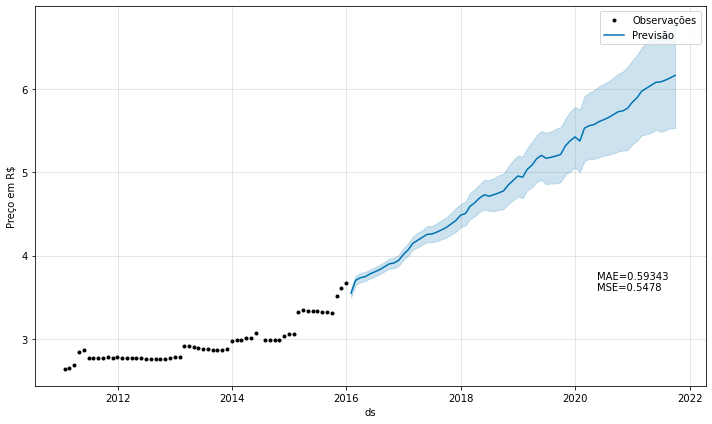

In [96]:
from matplotlib import pyplot

plt.figure(figsize=(15,5))
modelo_mensal.plot(y_pred)
plt.legend(['Observações','Previsão'])
plt.ylabel("Preço em R$")
plt.text(s='MAE=0.59343\nMSE=0.5478',x=18400,y=3.58)

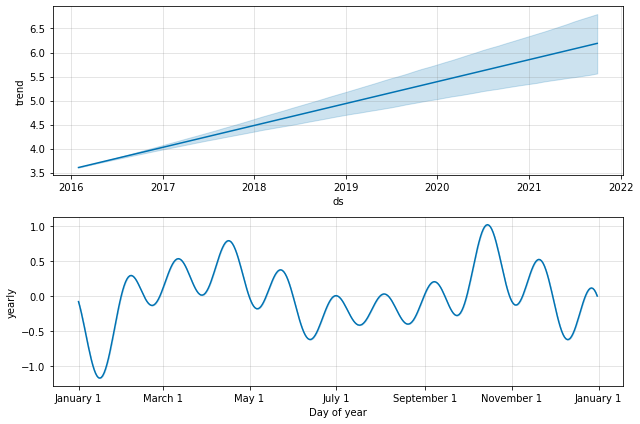

In [97]:
modelo_mensal.plot_components(y_pred);

In [46]:
print("MAE",metrics.mean_absolute_error(df_test['y'].values,y_pred['yhat'].values))
print("MSE",metrics.mean_squared_error(df_test['y'].values,y_pred['yhat'].values))

MAE 0.5933785410924792
MSE 0.5478412570208157


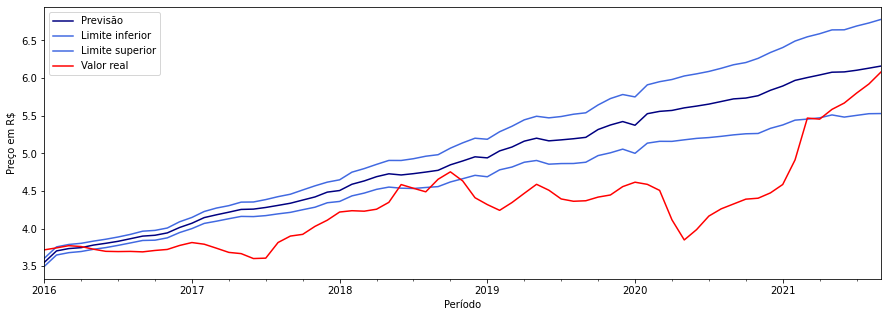

In [98]:
y_pred.set_index('ds')['yhat'].plot(color='navy',figsize=(15,5),label='Previsão')
y_pred.set_index('ds')['yhat_lower'].plot(color='royalblue',label='Limite inferior')
y_pred.set_index('ds')['yhat_upper'].plot(color='royalblue',label='Limite superior')
df_test.set_index('ds')['y'].plot(color='red',label='Valor real')
plt.xlabel("Período")
plt.ylabel("Preço em R$")
plt.legend()

# PPI

In [69]:
df_treino=df_gasolina.iloc[-69:-21]
df_test=df_gasolina.iloc[-21:]

In [70]:
modelo_mensal = Prophet()
modelo_mensal.fit(df_treino)
y_pred=modelo_mensal.predict(df_test)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(18700, 3.6, 'MAE=0.6437\nMSE=0.8019')

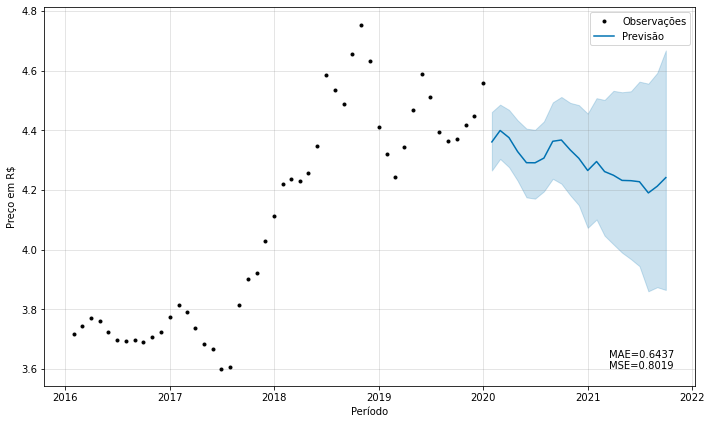

In [71]:
import matplotlib.pyplot
#plt.figure(figsize=(15,5))
modelo_mensal.plot(y_pred);
plt.legend(['Observações','Previsão'])
plt.ylabel('Preço em R$')
plt.xlabel('Período')
plt.text(s='MAE=0.6437\nMSE=0.8019',x=18700,y=3.6)

In [ ]:
#df_cross_val=cross_validation(modelo_mensal,horizon='30 days')

In [149]:
reg_report=performance_metrics(df_cross_val)

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


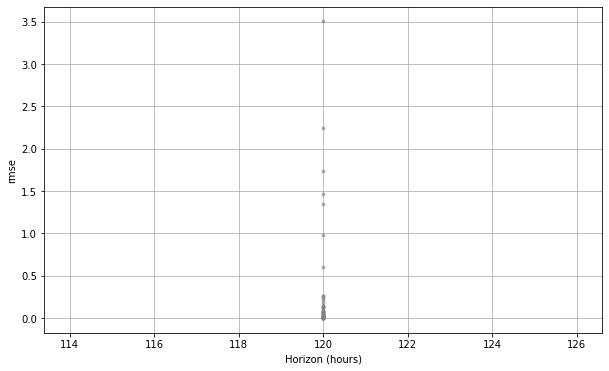

In [150]:
plot_cross_validation_metric(df_cross_val,'rmse');

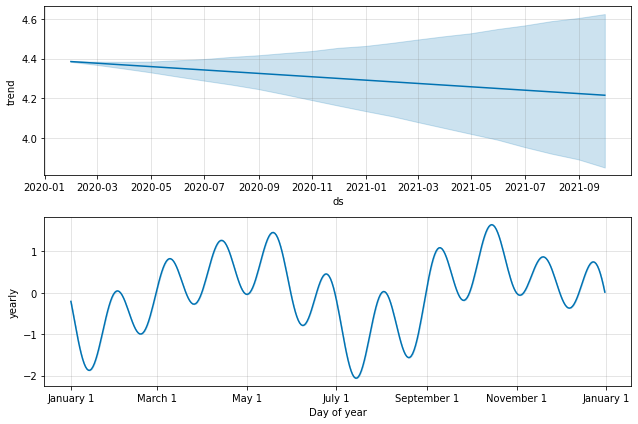

In [72]:
modelo_mensal.plot_components(y_pred);

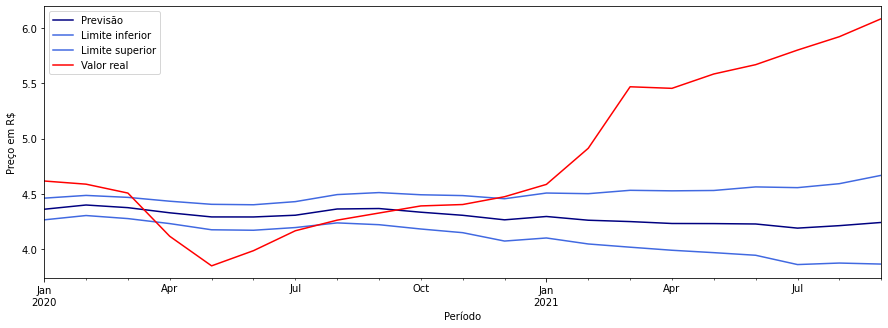

In [91]:
y_pred.set_index('ds')['yhat'].plot(color='navy',figsize=(15,5),label='Previsão')
y_pred.set_index('ds')['yhat_lower'].plot(color='royalblue',label='Limite inferior')
y_pred.set_index('ds')['yhat_upper'].plot(color='royalblue',label='Limite superior')
df_test.set_index('ds')['y'].plot(color='red',label='Valor real')
plt.xlabel("Período")
plt.ylabel("Preço em R$")
plt.legend()

In [85]:
print("MAE",metrics.mean_absolute_error(df_test['y'].values,y_pred['yhat'].values))
print("MSE",metrics.mean_squared_error(df_test['y'].values,y_pred['yhat'].values))

MAE 0.6437117634235441
MSE 0.8019206788059257
